0. Setting

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rc("font",size=14)
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [3]:
train_df=pd.read_csv("C:/Users/강민채/Desktop/KUBIG/ML/self/week 4/train.csv")
test_df=pd.read_csv("C:/Users/강민채/Desktop/KUBIG/ML/self/week 4/test.csv")

1. 자료 구조 확인 및 EDA

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#결측치 확인
train_df.isna().sum()

#cabin은 누락된 자료의 개수가 매우 많으므로 추후 변수 자체를 제거할 예정.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

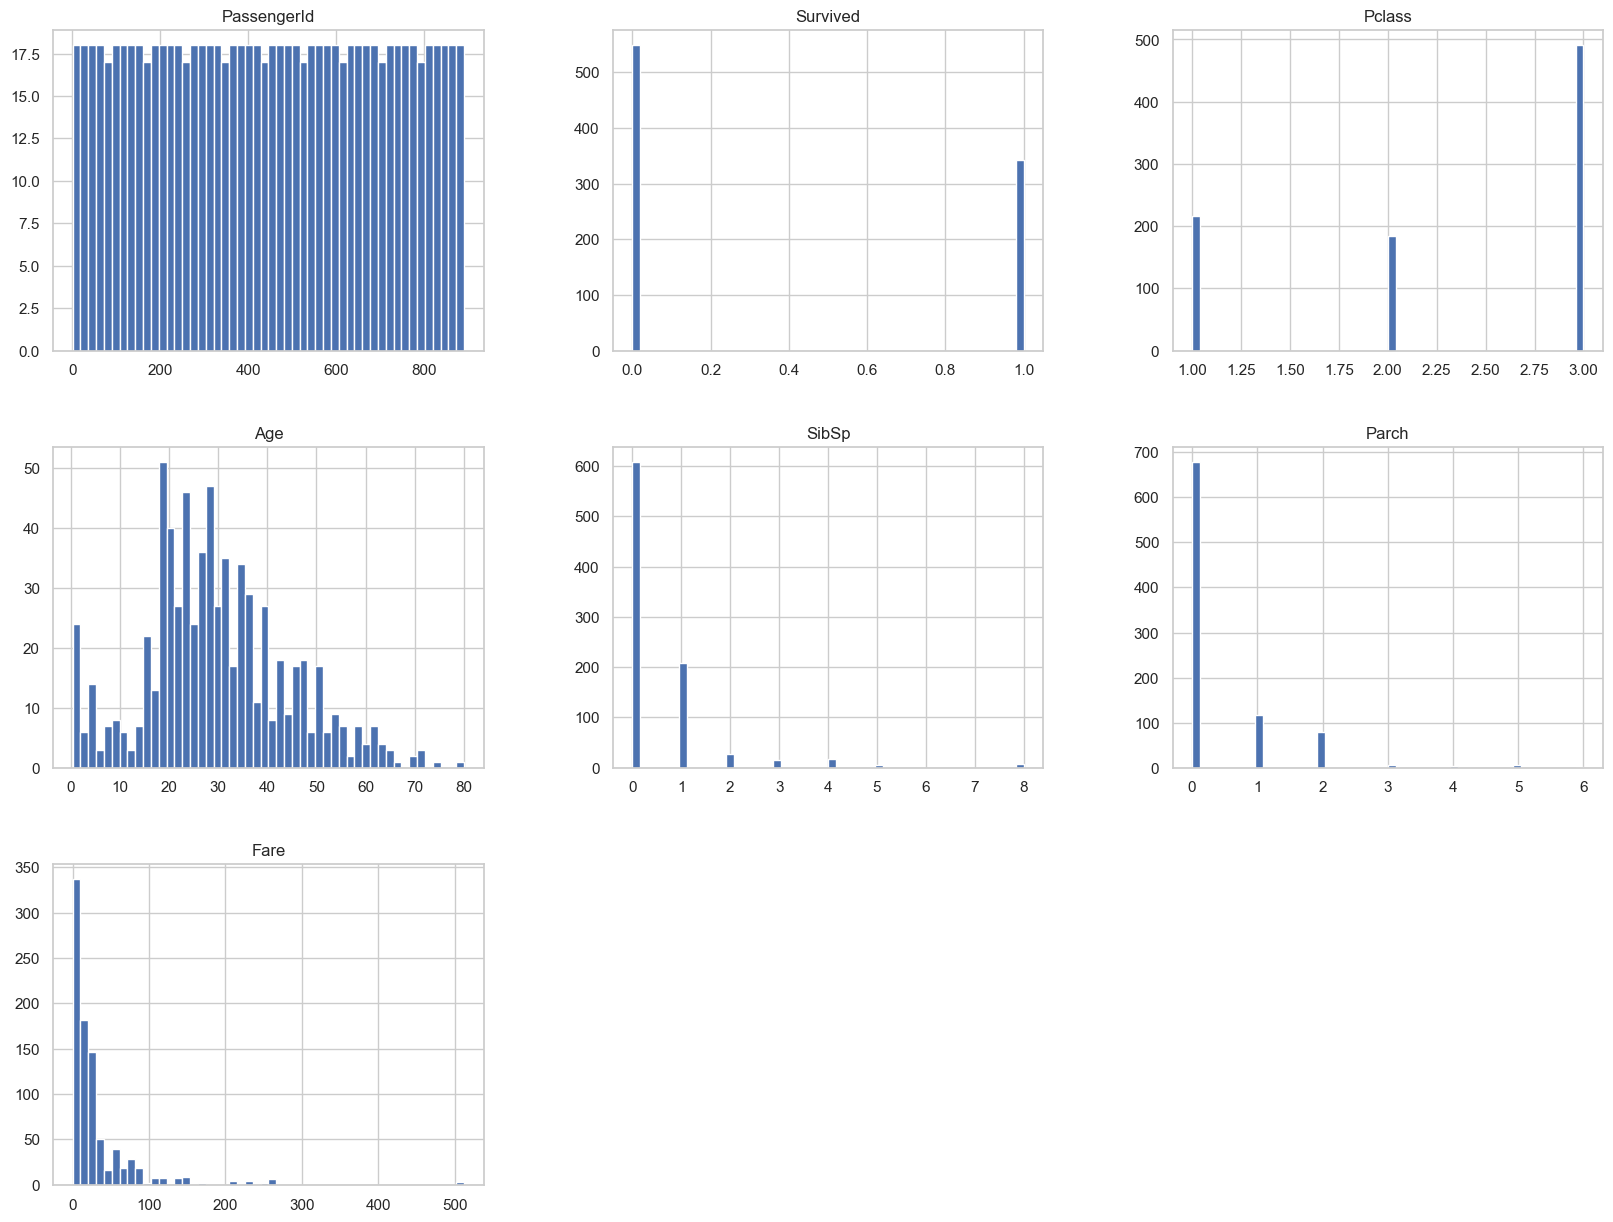

In [8]:
train_df.hist(bins=50, figsize=(20,15))

In [9]:
#Pclass에 따른 생존 여부 비교
pd.crosstab(index = train_df['Pclass'], columns=train_df['Survived'], margins=True, margins_name="Total")

Survived,0,1,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
Total,549,342,891


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


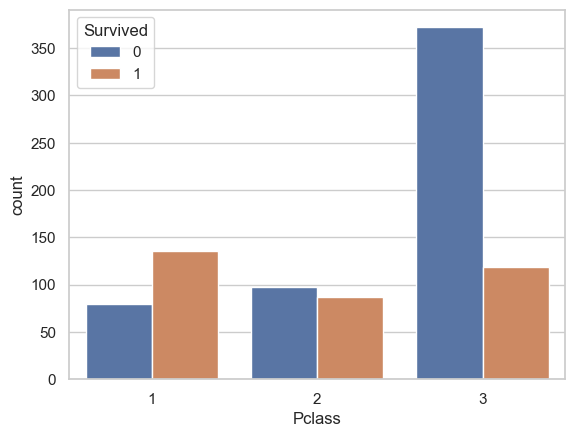

In [10]:
sns.countplot('Pclass',hue='Survived',data=train_df)
plt.show()

In [11]:
Pclass_num=train_df['Pclass'].value_counts()
Pclass_survived=train_df.groupby('Pclass')['Survived'].sum()

Pclass_survived_rate=Pclass_survived/Pclass_num
Pclass_survived_rate

#Pclass가 높을수록 생존율이 높음.

1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [12]:
#성별에 따른 생존 여부 비교
pd.crosstab(index = train_df['Sex'], columns=train_df['Survived'], margins=True, margins_name="Total")

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

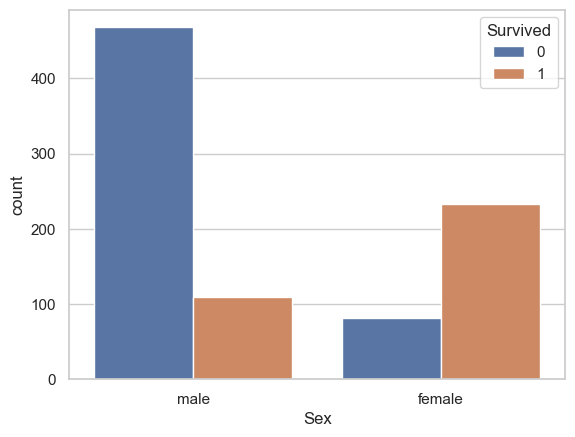

In [13]:
sns.countplot('Sex',hue='Survived',data=train_df)

In [14]:
Sex_num=train_df['Sex'].value_counts()
Sex_survived=train_df.groupby('Sex')['Survived'].sum()
Sex_survived_rate=Sex_survived/Sex_num
Sex_survived_rate

#여성의 생존율이 남성에 비해 높음

female    0.742038
male      0.188908
dtype: float64

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


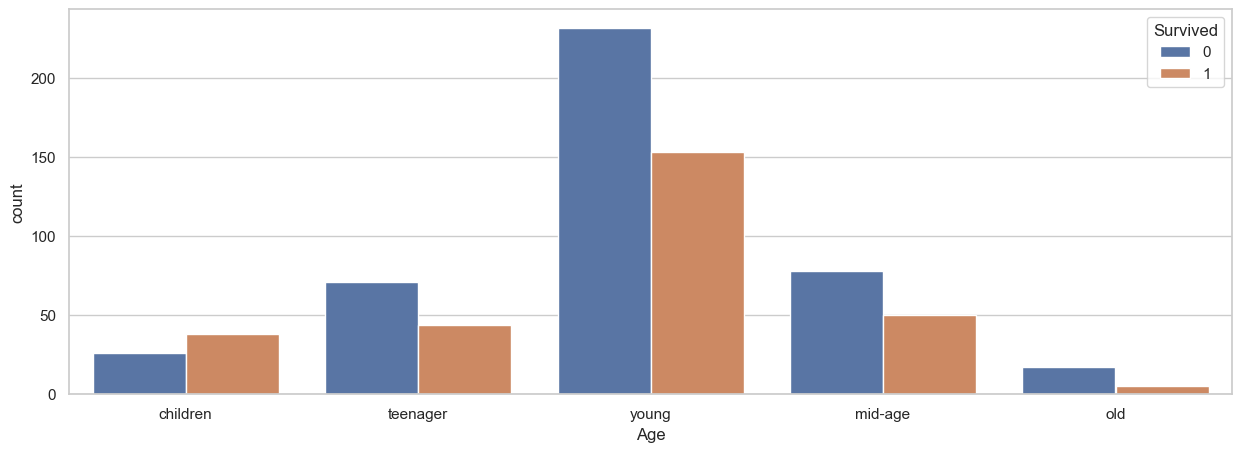

In [15]:
#나이에 따른 생존 여부 비교
age_group = train_df.copy()
label = ["children","teenager","young","mid-age","old"]
bin1 = [0,10,20,40,60,90]
age_group["Age"] = pd.cut(x = age_group["Age"], bins = bin1, labels = label)
plt.figure(figsize = (15,5))
sns.countplot(age_group["Age"], hue = age_group["Survived"])
plt.show()

#10세 이하는 생존자가 사망자보다 더 많음.

In [16]:
#형제자매 수에 따른 생존율 비교
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

2. Data Prep

범주형 수치화

In [18]:
train_df.info()   #Sex, Embarked만 변경하면 됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
X_cat = train_df[['Sex', 'Embarked']]
X_cat = pd.get_dummies(X_cat)

In [20]:
X_cat_2=test_df[['Sex','Embarked']]
X_cat_2=pd.get_dummies(X_cat_2)

In [21]:
X_num=train_df[['Survived','Pclass','Age','SibSp','Parch','Fare']]
X_num_2=test_df[['Pclass','Age','SibSp','Parch','Fare']]
# 이 과정에서 불필요한 변수는 생략.

In [22]:
# 범주형 데이터와 수치형 데이터 합치기
train_df_final = pd.concat([X_num, X_cat], axis=1)
test_df_final=pd.concat([X_num_2,X_cat_2], axis=1)

변수 간 상관관계 확인

<AxesSubplot:>

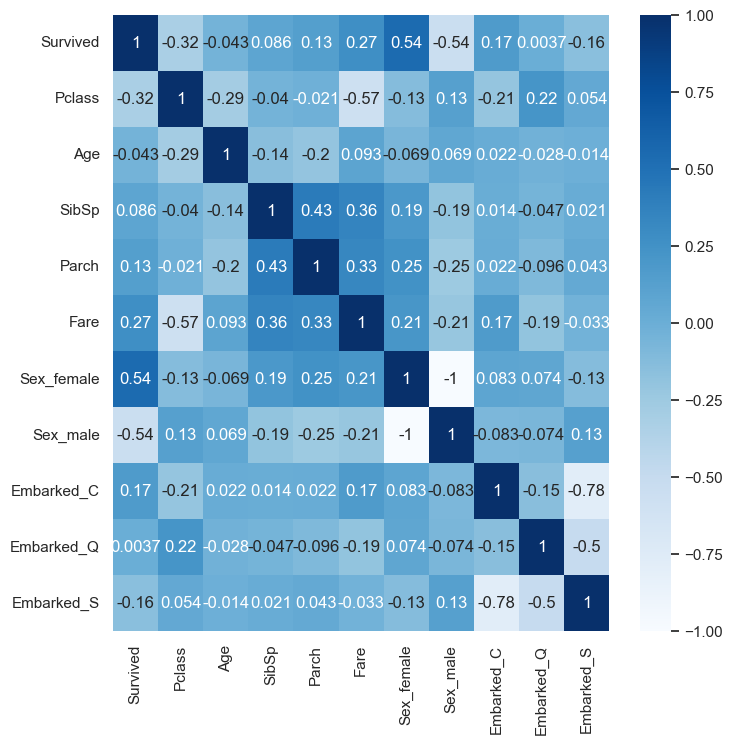

In [23]:
corr=train_df_final.corr(method='kendall')
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="Blues")

결측치 처리

In [24]:
train_df_final.isna().sum()    
#범주형을 수치화하면서 embarked의 결측치가 C/Q/S 변수 모두 (0,0,0)으로 바뀜. 그 행을 찾아서 C/Q/S 중 하나를 채워줄 예정

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [25]:
test_df_final.isna().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Embarked 변수

In [26]:
#범주형을 수치화하면서 embarked의 결측치가 C/Q/S 변수 모두 (0,0,0)으로 바뀜. 그 행을 찾아서 C/Q/S 중 하나를 채워줄 예정
# Embarked 결측치 있는 행 찾기
train_df.loc[train_df['Embarked'].isnull()==True]

#61번, 829번 행 / 두 행 모두 Pclass가 1임. Pclass=1인 데이터 중 가장 많은 사람들의 Embarked로 결측치 대체하겠음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
# Embarked는 Pclass와 연관성이 그나마 높음.
train_df_final.groupby('Pclass')[['Embarked_C','Embarked_Q','Embarked_S']].sum()

# 두 행 모두 Pclass=1이고, Pclass가 1인 사람들 중에는 Embarked_S가 가장 많으므로 두 행의 Embarked 결측치를 Embarked_S=1로 채워주겠음.

,Embarked_C,Embarked_Q,Embarked_S
Pclass,,,
1,85.0,2.0,127.0
2,17.0,3.0,164.0
3,66.0,72.0,353.0


In [28]:
train_df_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [29]:
train_df_final.iloc[61,10]=1
train_df_final.iloc[829,10]=1

Age 변수

In [30]:
# Age 결측치는 Pclass, SibSp, Parch, Fare 변수로 예측하여 대체.

##1 (회귀 돌릴 데이터)
#1-1 Age 열에서 결측치 제외하고 추출
age_full_train=train_df_final.dropna(subset=['Age'])

#1-2 학습/정답 데이터 정의
train_x=age_full_train[['Pclass','SibSp','Parch','Fare']]
train_y=age_full_train['Age']

In [31]:
##2 (예측해야 할 데이터)
#2-1 학습/테스트 데이터셋에서 결측치 있는 행 추출(예측 대상)

age_null_train=train_df_final.loc[train_df_final['Age'].isnull()]
age_null_test=test_df_final.loc[test_df_final['Age'].isnull()]

In [32]:
#2-2 예측해야 할 데이터에서 x 설정
age_null_train_x=age_null_train[['Pclass','SibSp','Parch','Fare']]
age_null_test_x=age_null_test[['Pclass','SibSp','Parch','Fare']]

In [33]:
##3 데이터를 실수 자료 형태로 전환
train_x=train_x.apply(pd.to_numeric)
train_x=train_x.astype(float)
train_y=train_y.apply(pd.to_numeric)
train_y=train_y.astype(float)

In [34]:
##4 회귀
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(train_x,train_y)

Ridge()

In [35]:
##5 예측
test_at_train_pred=abs(model.predict(age_null_train_x))
print(test_at_train_pred)

[27.5339525  34.20225953 27.5582485  27.5582485  27.54536076 27.54503374
 34.50649354 27.547906   27.55816576 27.54503374 27.54199601 23.57204547
 27.547906   19.62712968 40.51678816 40.67003835 22.37983821 27.54503374
 27.54199601 27.54716725 27.54199601 27.54199601 27.54503374 27.5474135
 23.40164052 27.54199601 27.547906   22.239722   25.0058088  27.55652475
 27.52992976  6.64946829 38.9354233  40.7054156  14.53211537  6.64946829
 34.16187454 40.23113826 23.57204547 27.547906   27.547906    6.64946829
 23.72472041 27.54503374 14.53211537 27.551846   23.59264772 23.57204547
 27.557756   39.65589845 27.547906   27.547906   40.60543813 27.547906
 34.45835944 40.7039381  40.67003835 40.61528813 27.547906   19.59618493
 34.21506452 27.54199601 39.03173765  6.64946829 19.59618493 34.76004822
 27.54503374 23.56022547 40.52663816 27.5582485  27.54536076 27.54536076
 23.57204547 27.55816576 27.547906   35.77418812 27.54503374 27.54831576
 14.53211537 27.54503374 27.56547249 34.45835944 27.54

In [36]:
test_at_test_pred=abs(model.predict(age_null_test_x))
print(test_at_test_pred)

[27.54503374 40.59197713 19.62712968 21.02100053 27.54199601 26.58761406
 40.6931031  27.547906   34.1514493  23.56022547 34.04465958 27.54199601
 27.54503374 34.247406   23.59264772 27.547906   27.5474135  27.54199601
 27.547906   27.547906   27.52894476 27.54733076 27.57376225 23.72472041
 27.547906   19.59618493 22.41002715 23.75057666 40.19444702 40.6931031
 27.54503374 27.54823499 27.562681   40.67003835 27.551846   27.55816576
 27.547906    6.64946829 40.7039381  27.54076476 27.39523105 40.70902661
 27.561696   27.54536076 27.54199601 25.0058088  27.547906   27.54536076
 27.54519725 21.02100053 23.59264772 27.551846   27.547906   27.54503374
 41.21613793 27.551846   27.54199601 27.547906   23.57204547 27.5582485
 27.547906   27.557756   27.55816576 27.54199601 40.43601819 27.55816576
 19.62712968 34.16195728 27.547906   27.5513535  27.5582485  27.55816576
 11.73232586 22.39453046 27.54536076 27.547906   11.73232586 23.59256695
 27.547906   27.41493105 34.20472203 27.54848124 27.5

In [37]:
train_df_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [38]:
##6 Age 결측치 대체
for i in range(len(train_df_final)):
    if np.isnan(train_df_final.iloc[i,2]) == True:
        for j in range(len(test_at_train_pred)):
            train_df_final.iloc[i, 2] = test_at_train_pred[j]
    else:
        pass
print('대체된 Age 값: \n', train_df_final['Age'])

대체된 Age 값: 
 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.021001
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [39]:
test_df_final.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [40]:
for i in range(len(test_df_final)):
    if np.isnan(test_df_final.iloc[i,1]) == True:
        for j in range(len(test_at_test_pred)):
            test_df_final.iloc[i,1] = test_at_test_pred[j]
    else :
        pass
print('대체된 Age 값: \n', test_df_final['Age'])

대체된 Age 값: 
 0      34.500000
1      47.000000
2      62.000000
3      27.000000
4      22.000000
         ...    
413    22.239722
414    39.000000
415    38.500000
416    22.239722
417    22.239722
Name: Age, Length: 418, dtype: float64


Fare 변수

In [41]:
# Fare는 Pclass와 상관관계가 높음

test_df_final.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [42]:
test_df_final.loc[test_df_final['Fare'].isnull()==True]
# Fare 결측치 행은, Pclass=3이므로 해당 그룹의 평균인 12.466345로 결측치 대체.

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
152,3,60.5,0,0,NaN,0,1,0,0,1


In [43]:
test_df_final['Fare'].fillna(value=12.466345,inplace=True)

결측치 최종 확인

In [44]:
train_df_final.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [45]:
test_df_final.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Modeling

In [46]:
# perfect multicollinearity 피하기 위해 수치화 해준 범주형 변수들(Sex,Embarked)은 각각 하나의 소범주(?)를 제외하고 분석
# Sex_female, Embarked_Q 변수는 분석 시 제외하겠음

In [49]:
# x,y 변수 할당: test 데이터셋에는 Survived가 없음. 따라서, train 데이터셋을 다시 train/test로 쪼개서 성능을 검증한 후, 성능이 좋으면 기존 test 데이터를 넣어서 예측만 할 예정.
X=train_df_final[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_S']]
y=train_df_final['Survived']


# 성능 검증용 아님. 기존 test 데이터셋으로 survived 예측만 할 때 사용할 X_test_final
X_test_final=test_df_final[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_S']]

In [50]:
# 성능 검증용으로 데이터셋 분할
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred=model_LR.predict(X_test)

#생존할 확률 구하기(Survived=1일 확률을 나타내는 열만 뽑아내기)
y_pred_prob = model_LR.predict_proba(X_test)[:, 1]

# 성능 평가하기
print("accuracy: %.2f" %accuracy_score(y_test,y_pred))
print("Precision: %.3f"% precision_score(y_test,y_pred))
print("Recall : %.3f" % recall_score(y_test,y_pred))
print("F1 : %.3f" % f1_score(y_test,y_pred))

accuracy: 0.78
Precision: 0.842
Recall : 0.608
F1 : 0.706


2. 의사결정 나무

In [60]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,y_train)

y_pred2=model_dtc.predict(X_test)
y_pred2_prob = model_dtc.predict_proba(X_test)[:,1]

#성능 평가하기
print("accuracy: %.2f" %accuracy_score(y_test,y_pred2))
print("Precision: %.3f"% precision_score(y_test,y_pred2))
print("Recall : %.3f" % recall_score(y_test,y_pred2))
print("F1 : %.3f" % f1_score(y_test,y_pred2))

accuracy: 0.79
Precision: 0.789
Recall : 0.709
F1 : 0.747


3. KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred3 = model_knn.predict(X_test)

#모델 성능 평가
print("accuracy: %.2f" %accuracy_score(y_test,y_pred3))
print("Precision: %.3f"% precision_score(y_test,y_pred3))
print("Recall : %.3f" % recall_score(y_test,y_pred3))
print("F1 : %.3f" % f1_score(y_test,y_pred3))

accuracy: 0.68
Precision: 0.678
Recall : 0.506
F1 : 0.580
